# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Homework 4
Due Wednesday, February 17

### Problem 1

(from **Insight**, P6.1.10)

Write a program that generates $n=10$ real numbers selected randomly and
uniformly distributed from the set
$\{x : 0 < x < 2\text{ or }7 < x < 10\}$.

In [1]:
function randomIntegerSampled(n)
    
    # init an empty array to return random numbers at the end
    arr = zeros(Float64,n)
    i = 1 # to keep track of how many random numbers selected
    
    # repeat until n real random numbers are chosen
    while i ≤ n
        
        roll = 10*rand() # generate a single real random number in interval [0,10]
        
        # only select it if it is within either one of these intervals
        if ( (0<roll<2) || (7<roll<10) )
            
            arr[i] = roll # set its value into predefind array
            i += 1 # add one to the iteration 
            
        end
        
    end
    
    # return the generated real random numbers of length n that are only in intervals
    # [0,2] or [7,10]
    return arr

end

randomIntegerSampled (generic function with 1 method)

In [2]:
x = randomIntegerSampled(10) # For demonstraton purposes as n=10

10-element Array{Float64,1}:
 8.874844518852882
 8.414870864319282
 9.831423497293706
 1.9432782642028479
 0.8869255272515875
 1.1135935465822944
 1.7030357352475267
 0.43243983084534143
 1.3650988130223696
 0.4193917149976123

### Problem 2

(from **Insight**, P6.1.12)

Assume that the coefficients of the quadratic $a x^2 + bx + c$ are selected from the uniform
distribution on $(−2, 2)$. What is the probability of complex roots? What if the coefficients are
generated with `randn` with mean $\mu=0$ and standard deviation $\sigma = 0.4$?

In [3]:
function characteristicRootsOfPolynomials(n,typeOfRandomness)
    
    # init the necessary variables
    hits = 0
    a = zeros()
    b = zeros()
    c = zeros()
    
    # if chosen distribution is normal
    if typeOfRandomness == "randn"
            
        σ = 0.4
        μ = 0
        
        # vectorized generation of the random variables a,b,c
        # skew the normal by std
        a = σ*randn(n) .+ μ
        b = σ*randn(n) .+ μ
        c = σ*randn(n) .+ μ
    
    # if chosen distribution is uniform
    elseif typeOfRandomness == "rand" 
        
        # vectorized generation of the random variables a,b,c
        # we shift the unit iterval of uniform random variables to (-2,2) by the following procedure
        a = 4*rand(n) .- 2
        b = 4*rand(n) .- 2
        c = 4*rand(n) .- 2
            
            
    end
    
    # count number of instances where the determinant is negative i.e. resulting in a complex number
    hits = count(@. b^2 - 4*a*c < 0)
    
    # return probability 
    return (hits/Float64(n))
    
end

characteristicRootsOfPolynomials (generic function with 1 method)

In [4]:
complexroots_from_uniform_probability = characteristicRootsOfPolynomials(100000,"rand") 
complexroots_from_normal_probability = characteristicRootsOfPolynomials(100000,"randn") 
println("The probability of complex roots given a uniform distrbution is: ", complexroots_from_uniform_probability)
println("The probability of complex roots given a normal distrbution is: ", complexroots_from_normal_probability)

The probability of complex roots given a uniform distrbution is: 0.37037
The probability of complex roots given a normal distrbution is: 0.34931


### Problem 3

(from **Insight**, P6.1.15)

Two points on the unit circle are randomly selected. What is the probability that the length
of the connecting chord is greater than 1?

In [5]:
function chordLengthProb(trials)
    
    # init the random values picked uniformely from the circumference of circle
    a = rand(trials)*2*pi
    b = rand(trials)*2*pi
    
    # count the number of instances where in the distance or the length of the line 
    # between two random points is more than 1
    hits = count(@. ((cos(a) - cos(b))^2 + (sin(a) - sin(b))^2) > 1)
    
    # return the probabilty 
    return (hits/Float64(trials))
end

chordLengthProb (generic function with 1 method)

In [6]:
chordLengthProb(1000000) # just for test purposes as expected

0.667126

### Problem 4

(from **Insight**, P6.1.19a)

Write a function `ProbG(L,R)` that returns an estimate of the area under the function
$$
f(x) =  \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$
from $L$ to $R$. (Assume $L < R$.) Use Monte Carlo. *Hint*: Throw darts in the rectangle having
vertices $(L, 0)$, $(R, 0)$, $(R, 1)$, and $(L, 1)$ and count how many are under the curve.

In [7]:
f(x) = (1/sqrt(2*pi)) * exp( -x^2/2 ) # the function to be simulated
d(p,q) = sqrt(p^2 + q^2) # the distance function to approximate the successful darts

function ProbG(L,R)
    
    # set an arbitrary trial amount
    n = 100000
    
    # init the random variables for the x and y coordinate in the rectangle form 
    xs = (R-L)*rand(n) .+ L
    ys = rand(n) 
    
    # count the instances where in the random points fall underneath the actual curve
    counts = count(@. d.(xs,ys) .≤ d.(xs,f(xs)) )
    
    # return the probability of counts times the area of rectangle which gives the approximate area
    approxArea = (counts/n)*(R-L)
    
    return approxArea
end


ProbG (generic function with 1 method)

In [8]:
ProbG(-1,1) # just for test purposes as expected

0.68528

### Problem 5

(from **Insight**, P6.2.5)

Consider the random walk function `random_walk(n)` from the lecture slides.

We conjecture that the walker is more likely to exit near the middle of an edge than near a
corner. Produce a bar plot that sheds light on this conjecture, for `n=20` and a large number of trials. 

In [9]:
using PyPlot

function random_walk(n)
    
    x = [0]
    y = [0]
    
    while abs(x[end]) < n && abs(y[end]) < n
        
        if rand() < 0.5
            
            if rand() < 0.5  # Up
                push!(x, x[end])
                push!(y, y[end] + 1)
                
                
            else             # Down
                push!(x, x[end])
                push!(y, y[end] - 1)
                
            end
            
        else
            
            if rand() < 0.5  # Right
                push!(x, x[end] + 1)
                push!(y, y[end])
                
                
            else             # Left
                push!(x, x[end] - 1)
                push!(y, y[end])
            
            end
            
        end
        
    end
    x,y
end

random_walk (generic function with 1 method)

In [10]:
function randomWalkExitHistogram(trial)
    
    n = 20 # length of the random walk rectangle on each axis
    
    exit = Int64[] # init an empty list of ints to store the values of the exit coordinate
    
    #while iter ≤ trial
    for i = 1:trial
        
        # extract the values for x & y coordinate from one simple RW
        x , y = random_walk(n)
        
        # check to see in which coordinate the random walk rached the corner, 
        # then add the last value of the other array 
        # since that contains the value for the second coordinate of exit
        if (x[end] == n || x[end] == -n )
            push!(exit,y[end])
        else
            push!(exit,x[end])
        end
        
    end
    
    # Plot the histogram of the respective exit locations and their frequency
    # the bins are defined as such instead of '20' to avoid a floating point error
    PyPlot.hist(exit,bins=collect(-n+.5:1:n-.5)); 
    PyPlot.xlabel("location on either y or x axis upon exit")
    PyPlot.ylabel("frequency of exit at each location")
    PyPlot.title("Simple Random Walk Exit Location Conjecture Histogram")
    
    return 
end

randomWalkExitHistogram (generic function with 1 method)

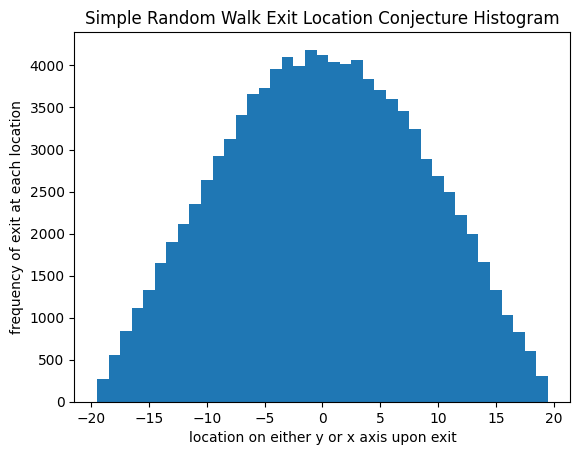

In [11]:
randomWalkExitHistogram(100000)

This histogram does indeed support the hypothesis that most of the exits do occur towards the middle rather than the edge/corners of the simple random walk enviornment.

### Problem 6

Use Monte Carlo simulation with one million trials to estimate the probability that a random poker hand contains two pairs (that is, two of each of two different ranks and a fifth card of a third rank).

In [12]:
using Random

function card_rank(card)
    (card - 1) % 13 + 1
end

function probOfTwoPairs(trials)
    
    # store the value for the total number of two pairs
    total = 0


    for itrial = 1:trials
    
        # randomly select a deck of 5 cards from 52 cards
        cards = randperm(52)
        hand = cards[1:5]
        rank = card_rank.(hand)
        
        # check how many single pairs we have at each trial
        pairs = 0

        for i = 1:5
        
            # check to see if the occurence if the current element in the hand is exactly two
            if count(rank[i] .∈ rank) == 2

             
                rank[i] = 0 # to prevent the double counting for when the same rank is counted twice,
                            # 0 is never counted since its not in ranks
            
                pairs += 1 
            
            end
            
        end
    
        # if at any point there is two pairs already, stop and add 1 to the total
        if pairs == 2
            total += 1
        end
    end
    
    # Returns the Probability of two pairs
    return ((total)/(trials))
    
end


probOfTwoPairs (generic function with 1 method)

In [13]:
probOfTwoPairs(1000000)

0.047488

### Problem 7

Use array functions and vectorization to solve the problems below using *only a single line of code* for each problem.

In [14]:
A = reshape((-22:22) .% 11, 9, 5)          # For testing

9×5 Array{Int64,2}:
   0   -2  -4   5   3
 -10   -1  -3   6   4
  -9    0  -2   7   5
  -8  -10  -1   8   6
  -7   -9   0   9   7
  -6   -8   1  10   8
  -5   -7   2   0   9
  -4   -6   3   1  10
  -3   -5   4   2   0

### Problem 7(a)

Count the number of elements $a$ of $A$ that satisfy $a^2<10$.

In [15]:
count(a -> a^2 < 10,A)

17

### Problem 7(b)

Create a matrix which contains only the columns $j$ of $A$ where the first element $A_{1,j} \ge 0$.

In [16]:
B = [A[:,j] for j = 1:size(A,2) if A[1,j] ≥ 0]

3-element Array{Array{Int64,1},1}:
 [0, -10, -9, -8, -7, -6, -5, -4, -3]
 [5, 6, 7, 8, 9, 10, 0, 1, 2]
 [3, 4, 5, 6, 7, 8, 9, 10, 0]

### Problem 7(c)

Modify $A$ in the following way: Multiply all the elements that are even by 3 (you might need to print $A$ on a separate line to see the full matrix):

In [17]:
A[A .% 2 .== 0] .*= 3;

In [18]:
A

9×5 Array{Int64,2}:
   0   -6  -12   5   3
 -30   -1   -3  18  12
  -9    0   -6   7   5
 -24  -30   -1  24  18
  -7   -9    0   9   7
 -18  -24    1  30  24
  -5   -7    6   0   9
 -12  -18    3   1  30
  -3   -5   12   6   0